<a href="https://colab.research.google.com/github/wcjona/BMEN_415_Final_Project/blob/main/Regression_Models/Jonathans_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
def preprocessing(standardize=False, normalize=False):
  df = pd.read_csv("/content/drive/MyDrive/BMEN_415_Group10/ML_Models/Dataset/Volumetric_features.csv")
  # Cleaning
  df = df.drop(columns=["S.No", "dataset", "Left-WM-hypointensities", "Right-WM-hypointensities", "Left-non-WM-hypointensities", "Right-non-WM-hypointensities"])
  df = df.drop_duplicates()
  df = df.dropna()
  # Split
  y = df["Age"]
  x = df.loc[:,df.columns!="Age"]
  if standardize:
    x=(x-x.mean())/x.std()
  if normalize:
    x=(x-x.min())/(x.max()-x.min())

  return train_test_split(x,y, test_size=0.2, random_state=142)

In [ ]:
def process(regressor, std_nrm = True):
  results = {}
  x_train, x_test, y_train, y_test = preprocessing()
  regressor.fit(x_train, y_train)
  results["None"] =   regressor.score(x_test, y_test)
  if not std_nrm:
    return results["None"] 

  x_train, x_test, y_train, y_test = preprocessing(standardize=True)
  regressor.fit(x_train, y_train)
  results["Standardized"] =   regressor.score(x_test, y_test)
  
  x_train, x_test, y_train, y_test = preprocessing(normalize=True)
  regressor.fit(x_train, y_train)
  results["Normalized"] =   regressor.score(x_test, y_test)
  y_pred = regressor.predict(x_test)
  print(f"MSE: {mean_squared_error(y_test, y_pred)}")
  return results

## Partial Least Squares Regression

In [ ]:
from sklearn.cross_decomposition import PLSRegression
x_train, x_test, y_train, y_test = preprocessing()
process(PLSRegression(n_components=100))

MSE: 60.0348308175448


{'None': 0.8487968124344293,
 'Standardized': 0.8487968124344267,
 'Normalized': 0.8487968124344283}

# Optimization:

Text(0.5, 0, 'Number of Components')

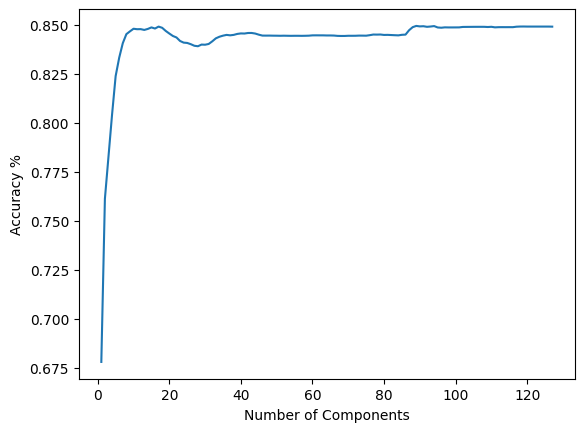

In [ ]:
# Our dataset has 128 features
# n_components is recommended ot be a range from 1 - # of features
scores = []
for i in range(1,128):
  scores.append(process(PLSRegression(n_components=i), False))

import matplotlib.pyplot as plt

plt.plot(range(1,128), scores)
plt.ylabel("Accuracy %")
plt.xlabel("Number of Components")

In [ ]:
# Number of Components
print(f"Number of Components: {scores.index(max(scores))+1} with Accuracy: {max(scores)}")

Number of Components: 89 with Accuracy: 0.8495592439955857


## Support Vector Machines for Regession











In [ ]:
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')


print(f"Regular SVM {process(svm.SVR())}")
print(f"Linear SVM {process(svm.LinearSVR())}")
print(f"Nu SVM {process(svm.NuSVR())}")


MSE: 66.85530987657228
Regular SVM {'None': 0.3675481267209365, 'Standardized': 0.835639209170744, 'Normalized': 0.8316188149218944}
MSE: 71.37666206945829
Linear SVM {'None': -0.1727594806916255, 'Standardized': 0.8487711030810343, 'Normalized': 0.820231377756482}
MSE: 69.0261142528475
Nu SVM {'None': 0.3072162139211644, 'Standardized': 0.8261107933271339, 'Normalized': 0.8261514464492212}


## Elastic Net Regression


In [ ]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(random_state=0)
process(regr)

MSE: 239.21033660005568


{'None': 0.8205761892220329,
 'Standardized': 0.7983741505230836,
 'Normalized': 0.39752698725034996}